In [2]:
import pandas as pd
import seaborn as sns

In [3]:
reference_data_path = '/Users/ayabellicha/Documents/model-monitoring-design/tabular-data/reference_data.csv'

new_data_path = '/Users/ayabellicha/Documents/model-monitoring-design/tabular-data/new_data.csv'


In [60]:
inference_data_path = '/Users/ayabellicha/Documents/model-monitoring-design/tabular-data/new_data_inference.csv'
groundtruth_data_path = '/Users/ayabellicha/Documents/model-monitoring-design/tabular-data/new_data_groundtruth.csv'



In [61]:
inf_df = pd.read_csv(inference_data_path)
truth_df = pd.read_csv(groundtruth_data_path)

In [65]:
df = pd.merge(inf_df,truth_df,on='Unnamed: 0',how='outer')
df

,Unnamed: 0,pred,pred_proba,ground_truth
0,40000,0,0.24,0
1,40001,0,0.02,0
2,40002,0,0.13,1
3,40003,0,0.05,0
4,40004,0,0.25,1
...,...,...,...,...
4995,44995,0,0.35,0
4996,44996,0,0.09,0
4997,44997,1,0.54,0
4998,44998,0,0.01,0


In [66]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['ground_truth'],df['pred'])

array([[4664,  211],
       [ 119,    6]])

In [4]:
reference_df = pd.read_csv(reference_data_path)
new_df = pd.read_csv(new_data_path)

In [55]:
ref_counts = reference_df.assembly_line_num.value_counts(normalize=True).reset_index()
ref_counts['source']='reference data'

new_counts = new_df.assembly_line_num.value_counts(normalize=True).reset_index()
new_counts['source']='new data'

counts_df = pd.concat([ref_counts,new_counts])
counts_df

,index,assembly_line_num,source
0,assembly_0,0.44225,reference data
1,assembly_1,0.28680,reference data
2,assembly_2,0.17355,reference data
3,assembly_3,0.07490,reference data
4,assembly_4,0.01980,reference data
5,assembly_5,0.00240,reference data
6,assembly_6,0.00030,reference data
0,assembly_0,0.44900,new data
1,assembly_1,0.28220,new data
2,assembly_2,0.16220,new data


<Axes: xlabel='assembly_line_num', ylabel='index'>

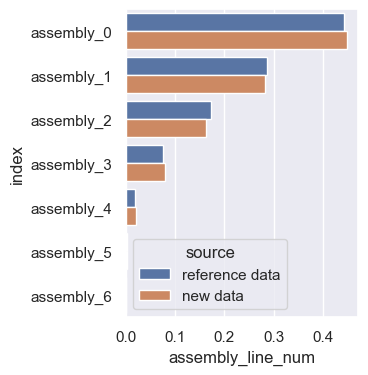

In [57]:
sns.barplot(x='assembly_line_num',y='index',hue='source',data=counts_df)

sns.displot(reference_df.assembly_line_num)
sns.displot(new_df.assembly_line_num)

/var/folders/b3/4kcrt1js7957c6tbljtdkg7w0000gn/T/ipykernel_78405/947708976.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_ref, shade=True, color='blue', label='reference')
/var/folders/b3/4kcrt1js7957c6tbljtdkg7w0000gn/T/ipykernel_78405/947708976.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_new, shade=True, color='red', label='new')


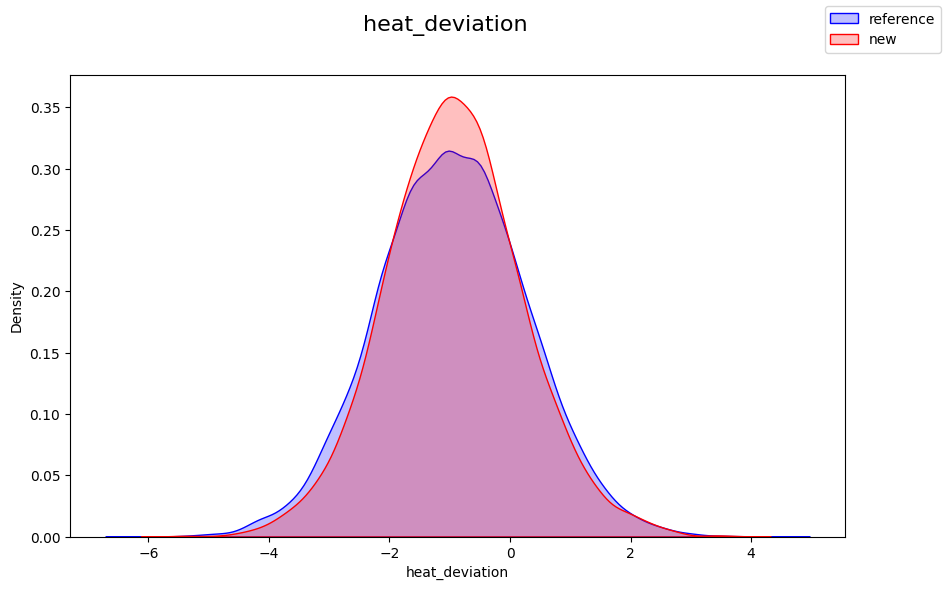

In [15]:
def kde_plot(x_ref, x_new, feature):
    fig = plt.figure(figsize=(10,6))
    sns.kdeplot(x_ref, shade=True, color='blue', label='reference')
    sns.kdeplot(x_new, shade=True, color='red', label='new')
    fig.suptitle(feature, fontsize=16)
    fig.legend()
    return fig

f = kde_plot(reference_df['heat_deviation'],new_df['heat_deviation'],'heat_deviation')

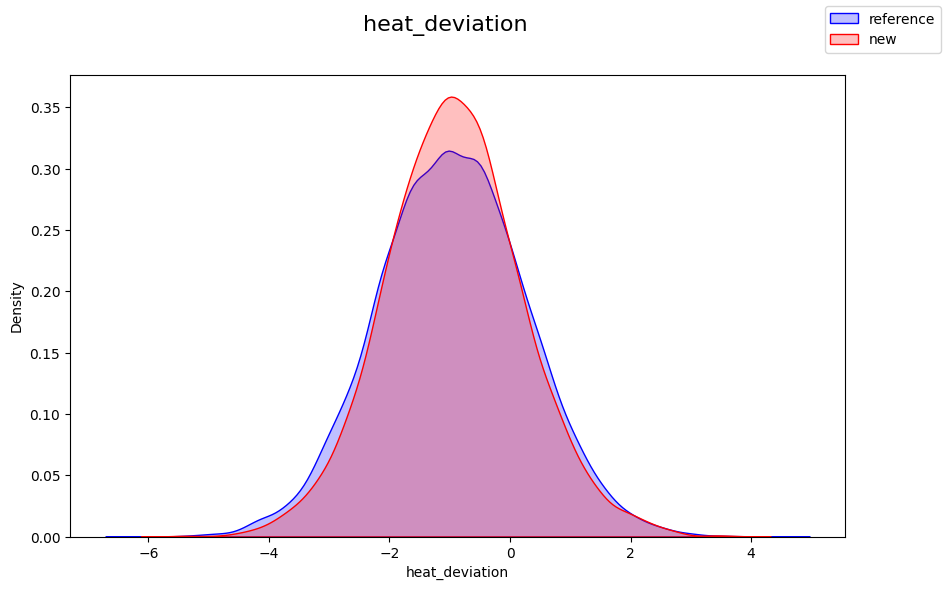

In [16]:
f

<Axes: xlabel='heat_deviation', ylabel='Density'>

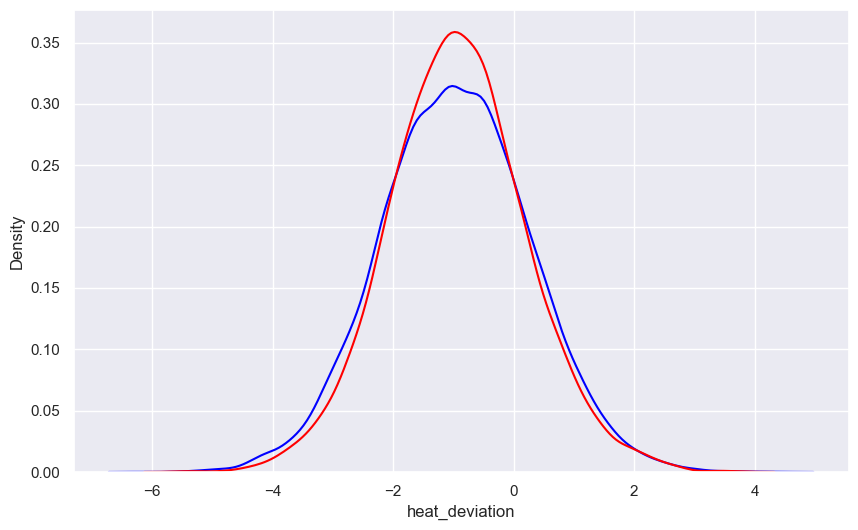

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))

plot1 = sns.kdeplot(reference_df['heat_deviation'],color='blue',label='ref_data')
sns.kdeplot(new_df['heat_deviation'],color='red',label='new_data')


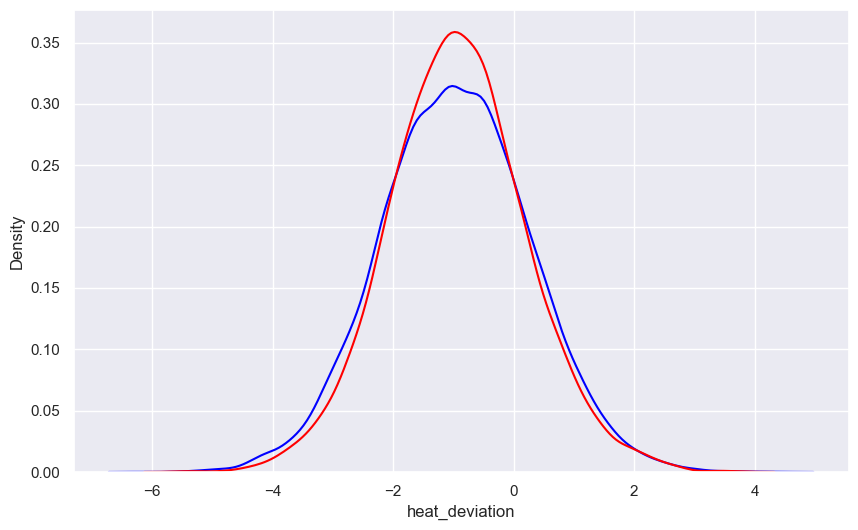

In [44]:
plot1.get_figure()

In [30]:
cols

['orange', 'orange', 'orange']

<Axes: >

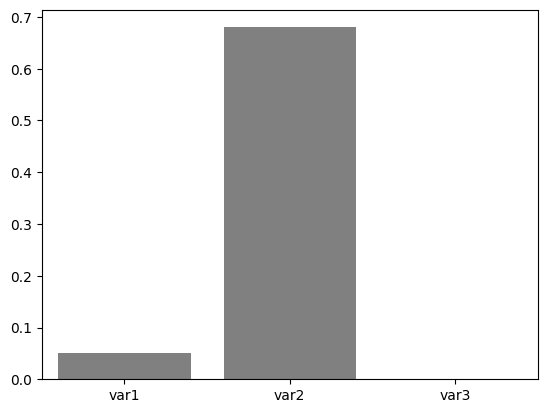

In [31]:
p_vals = {'var1':0.05,'var2':0.68,'var3':0.001}
drift_detected= {'var1':0,'var2':0,'var3':1}
cols = ['grey' if (x ==0) else 'orange' for x in drift_detected.values()]
sns.barplot(x=list(p_vals.keys()),y=list(p_vals.values()),palette=cols)

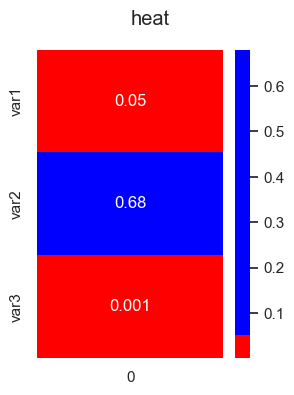

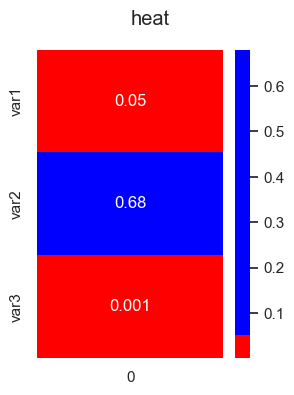

In [45]:
sns.set(rc={"figure.figsize":(3, 4)})
df = pd.DataFrame([p_vals]).T
heatmap = sns.heatmap(df,annot=True,cmap=['red','blue'],center=0.05)
heatmap.figure.suptitle('heat')
fig = heatmap.get_figure()
fig

In [ ]:
fig.set